In [6]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8106,Dodge,RAM 250,1993,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,NaN,Large,Regular Cab Pickup,16,11,1851,2000
3731,Ford,E-Series Van,2013,flex-fuel (unleaded/E85),255.0,8.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Large,Cargo Van,16,12,5657,32385
1712,Mazda,B-Series Pickup,2000,flex-fuel (unleaded/E85),143.0,6.0,MANUAL,rear wheel drive,4.0,Flex Fuel,Compact,Extended Cab Pickup,21,16,586,3107
10241,Toyota,Tacoma,2017,regular unleaded,278.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,Crew Cab Pickup,24,19,2031,31740
4735,Ford,Five Hundred,2006,regular unleaded,203.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Large,Sedan,26,19,5657,26380


<AxesSubplot:xlabel='Engine HP'>

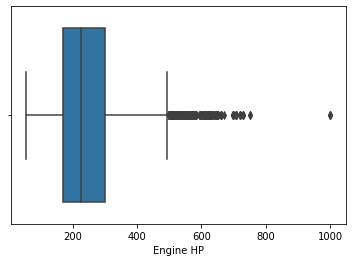

In [7]:
# With and without Outliers
sns.boxplot(x=df['Engine HP'])

In [8]:
# Sacar cuartiles

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [9]:
# Límite superior antes de outlier
ls = (Q3 + 1.5 * IQR)
ls

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [10]:
# Límite inferior antes de outlier
li = (Q1 - (1.5 * IQR))
li

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

In [11]:
df.shape

(11914, 16)

In [13]:
df_hp_with_outiers = df[((df < li) |(df > ls)).any(axis=1)]
df_hp_with_outiers.shape

ipykernel_launcher:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
ipykernel_launcher:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


(2830, 16)

In [14]:
df_hp_with_outiers["Engine HP"]

17       172.0
18       172.0
19       172.0
20       172.0
21       172.0
         ...  
11794    145.0
11810    106.0
11903    394.0
11904    394.0
11905    394.0
Name: Engine HP, Length: 2830, dtype: float64

¿Por qué aparecen aparecen más valores aparte de los que son outliers en la columna "Engine HP"? Porque con la fórmula también se quitan los outliers de las demás columnas.

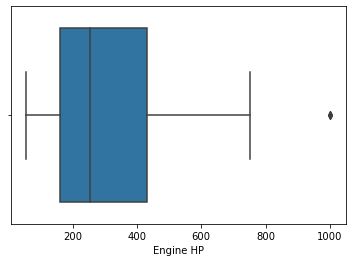

In [33]:
# Without Outliers
sns.boxplot(x=df_hp_with_outiers['Engine HP'])

In [15]:
df_without_outliers = df[~((df < li) |(df > ls)).any(axis=1)]
df_without_outliers.shape

ipykernel_launcher:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
ipykernel_launcher:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


(9084, 16)

In [26]:
df_without_outliers["Engine HP"]

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: Engine HP, Length: 9084, dtype: float64

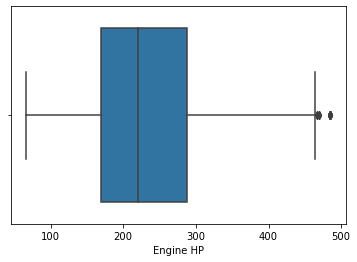

In [29]:
# Without Outliers
sns.boxplot(x=df_without_outliers['Engine HP'])

In [27]:
df_without_outliers["Engine HP"].max()

485.0

In [28]:
df_without_outlers["Engine HP"].min()

66.0

La decisión de eliminar cada outlier depende de cada problema

In [16]:
# Coger solo los outliers de Engine HP
# limite inferior
li_hp = li["Engine Hp"]
ls_hp = ls["Engine Hp"]

df_engineHP_column = df["Engine Hp"].copy () # estoy apuntando solmanete a la columna engine hp y le hago un copy paa no modificar nada 
#Para la siguiente funcion cogemos solo los outliers de la columna Engine HP
df_engineHP_with_outiers = df[((df["Engine HP"] < li_hp) | (df["Engine HP"] >  ls_hp))]
engine_hp_filtered = df_engineHP_with_outiers["Engine HP"]
engine_hp_filtered.shape


KeyError: 'Engine Hp'

In [ ]:
df_hp_with_outiers = df[((df < li) |(df > ls)).any(axis=1)]
df_hp_with_outiers.shape